In [3]:
import torch
from torch.autograd import Variable
import lycon
import numpy as np
import time, math
import scipy.io as sio
import matplotlib.pyplot as plt
import sys

sys.path.append('../pytorch-SRResNet/')

In [4]:
# model = _NetG()
# st_d = torch.load('./pytorch-SRResNet/model/py3_srresnet.pth')

# # create new OrderedDict that does not contain `module.`

# unneeded = ["residual.0.in1.running_mean", "residual.0.in1.running_var", "residual.0.in2.running_mean", "residual.0.in2.running_var", 
# "residual.1.in1.running_mean", "residual.1.in1.running_var", 
# "residual.1.in2.running_mean", "residual.1.in2.running_var", "residual.2.in1.running_mean", "residual.2.in1.running_var", "residual.2.in2.running_mean", 
# "residual.2.in2.running_var", "residual.3.in1.running_mean", "residual.3.in1.running_var", "residual.3.in2.running_mean", "residual.3.in2.running_var", 
# "residual.4.in1.running_mean", "residual.4.in1.running_var", "residual.4.in2.running_mean", "residual.4.in2.running_var", "residual.5.in1.running_mean", 
# "residual.5.in1.running_var", "residual.5.in2.running_mean", "residual.5.in2.running_var", "residual.6.in1.running_mean", "residual.6.in1.running_var", 
# "residual.6.in2.running_mean", "residual.6.in2.running_var", "residual.7.in1.running_mean", "residual.7.in1.running_var", "residual.7.in2.running_mean", 
# "residual.7.in2.running_var", "residual.8.in1.running_mean", "residual.8.in1.running_var", "residual.8.in2.running_mean", "residual.8.in2.running_var", 
# "residual.9.in1.running_mean", "residual.9.in1.running_var", "residual.9.in2.running_mean", "residual.9.in2.running_var", "residual.10.in1.running_mean", 
# "residual.10.in1.running_var", "residual.10.in2.running_mean", "residual.10.in2.running_var", "residual.11.in1.running_mean", "residual.11.in1.running_var", 
# "residual.11.in2.running_mean", "residual.11.in2.running_var", "residual.12.in1.running_mean", "residual.12.in1.running_var", "residual.12.in2.running_mean", 
# "residual.12.in2.running_var", "residual.13.in1.running_mean", "residual.13.in1.running_var", "residual.13.in2.running_mean", "residual.13.in2.running_var", 
# "residual.14.in1.running_mean", "residual.14.in1.running_var", "residual.14.in2.running_mean", "residual.14.in2.running_var", "residual.15.in1.running_mean", 
# "residual.15.in1.running_var", "residual.15.in2.running_mean", "residual.15.in2.running_var", "bn_mid.running_mean", "bn_mid.running_var"]

# from collections import OrderedDict
# new_state_dict = OrderedDict()
# for k, v in st_d.items():
#     if k not in unneeded:
#         new_state_dict[k] = v
# # load params
# model.load_state_dict(new_state_dict)

In [5]:
# model = _NetG()
model = torch.load('../pytorch-SRResNet/model/final.pth')

In [13]:
def run(path, model):
    im_l = plt.imread(path)
    im_b = lycon.resize(im_l, 32*4, 32*4, interpolation=lycon.Interpolation.LINEAR)
    
    im_input = im_l.astype(np.float32).transpose(2,0,1)
    im_input = np.expand_dims(im_input, axis=0)
    im_input = torch.Tensor(torch.from_numpy(im_input).float())
    
    out = model(im_input)
    im_h = out.data[0].numpy().astype(np.float32)
    im_h = im_h*255.
    im_h[im_h<0] = 0
    im_h[im_h>255.] = 255.            
    im_h = im_h.transpose(1,2,0)
    
    ax = plt.subplot("121")
    ax.imshow(im_b)
    ax.set_title("Input(Bicubic)")

    ax = plt.subplot("122")
    ax.imshow(im_h.astype(np.uint8))
    ax.set_title("Output(SRResNet)")
    plt.show()

[[[0.17254902 0.24313726 0.2509804 ]
  [0.14901961 0.21960784 0.22745098]
  [0.14117648 0.21176471 0.21960784]
  ...
  [0.05882353 0.12941177 0.16470589]
  [0.0627451  0.13333334 0.16078432]
  [0.04705882 0.12156863 0.14901961]]

 [[0.2        0.27058825 0.2784314 ]
  [0.14117648 0.21176471 0.21960784]
  [0.15294118 0.22352941 0.23137255]
  ...
  [0.04705882 0.12156863 0.14901961]
  [0.04313726 0.11764706 0.14509805]
  [0.04705882 0.12156863 0.14901961]]

 [[0.14901961 0.21960784 0.22745098]
  [0.13333334 0.20392157 0.21176471]
  [0.14117648 0.21176471 0.21960784]
  ...
  [0.03921569 0.11372549 0.13725491]
  [0.02745098 0.10196079 0.12941177]
  [0.02745098 0.10196079 0.12941177]]

 ...

 [[0.41568628 0.56078434 0.28627452]
  [0.4627451  0.5921569  0.3137255 ]
  [0.49411765 0.6117647  0.32941177]
  ...
  [0.69803923 0.7372549  0.49803922]
  [0.52156866 0.6        0.32156864]
  [0.4862745  0.57254905 0.27450982]]

 [[0.4862745  0.63529414 0.3372549 ]
  [0.50980395 0.6431373  0.34509805]


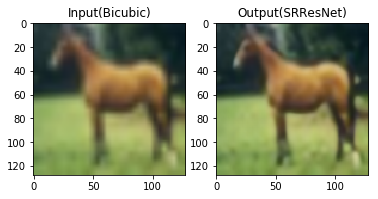

In [14]:
run('../pytorch-SRResNet/horse.png', model)